In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("train.csv")

#### Traditional Data Analysis process:

1. Define the question 
2. Process the data 
3. Clean the data
4. Analyze the data (EDA)
5. Data Modeling 
6. Visualize and share the findings

#### Question definition

Predict which passengers were transported by an anomaly using records recovered from the spaceship’s damaged computer system.

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [41]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
group            object
dtype: object

#### Analysing the passenger ID

 A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always

Idea: Create two columns, one column with the person group using gggg, and another column using "pp" to say how many people went with the person

In [6]:
df["group"] = df["PassengerId"].str[:4]

In [8]:
df["PassengerId"].shape

(8693,)

In [15]:
len(df["group"].unique()) # There's 2400 people which are part of a group

6217

In [18]:
df["group"].value_counts() # The highest amount of people within one group is 8 and the lowest 1

group
4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: count, Length: 6217, dtype: int64

#### Analysing the HomePlanet

In [27]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x129597dd0>,
 [Text(-0.14445288072599838, 1.0904739177302503, 'Earth'),
  Text(-0.5456478714190157, -0.955127426271436, 'Europa'),
  Text(0.8752009735838736, -0.6663507003356715, 'Mars')],
 [Text(-0.0787924803959991, 0.594803955125591, '54%'),
  Text(-0.29762611168309944, -0.520978596148056, '25%'),
  Text(0.4773823492275674, -0.36346401836491166, '21%')])

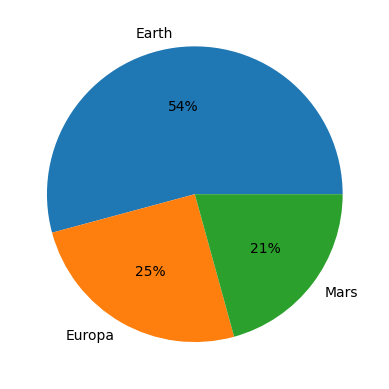

In [36]:
plt.pie(df["HomePlanet"].value_counts(), labels = df["HomePlanet"].value_counts().index,  autopct='%1.0f%%') 

The most common planet of origin is earth

Ideas: See the correlation between the planet and the transportation

In [44]:
df['Transported'] = df['Transported'].astype(int)

In [ ]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

In [45]:
df['Citable docs per Capita'].corr(df['Transported'])

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [46]:
##TODO